<a href="https://colab.research.google.com/github/mahikkaaa/Resume_Shorlisted/blob/main/Resume_Shortlisted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
!pip install PyPDF2
!pip install textract
import PyPDF2
import textract
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#https://towardsdatascience.com/resume-screening-with-python-1dea360be49b
#https://www.youtube.com/watch?v=hqu5EYMLCUw
#https://www.analyticsvidhya.com/blog/2021/06/resume-screening-with-natural-language-processing-in-python/
#https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset
#https://link.springer.com/chapter/10.1007/978-981-19-1018-0_26


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 KB 8.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 87.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 80.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Open pdf file
pdfFileObj = open('ats mahika.docx.pdf','rb')

# Read file
pdfReader = PyPDF2.PdfReader(pdfFileObj)



In [ ]:
!pip install 'PyPDF2<3.0'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 KB 5.7 MB/s eta 0:00:00
  Attempting uninstall: PyPDF2
    Found existing installation: PyPDF2 3.0.1
    Uninstalling PyPDF2-3.0.1:
      Successfully uninstalled PyPDF2-3.0.1


In [ ]:
!pip install PyPdf
# Get total number of pages

from PyPDF2 import PdfReader

reader = PdfReader("ats mahika.docx.pdf")
num_pages = len(reader.pages)
print(num_pages)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 KB 7.8 MB/s eta 0:00:00
1


In [ ]:
# Initialize a count for the number of pages
count = 0

# Initialize a text empty etring variable
text = ""

# Extract text from every page on the file
while count < num_pages:
    pageObj = reader.pages[0]
    count +=1
    text += pageObj.extract_text()



# Initialize a count for the number of pages
#count = 0

# Initialize a text empty etring variable
#text = ""

# Extract text from every page on the file
#while count < num_pages:
 #   pageObj = pdfReader.getPage(count)
  #  count +=1
   # text += pageObj.extractText()

Step #2: Text cleaning



In [ ]:
# Convert all strings to lowercase
text = text.lower()

# Remove numbers
text = re.sub(r'\d+','',text)

# Remove punctuation
text = text.translate(str.maketrans('','',string.punctuation))

Step #3: Dictionary with key terms by area setup*



In [ ]:
# Create dictionary with industrial and system engineering key terms by area
terms = {'Six Sigma Quality':['black belt','capability analysis','control charts','doe','dmaic','fishbone',
                              'gage r&r', 'green belt','ishikawa','iso','kaizen','kpi','lean','metrics',
                              'pdsa','performance improvement','process improvement','quality',
                              'quality circles','quality tools','root cause','six sigma',
                              'stability analysis','statistical analysis','tqm'],      
        'Operations management':['automation','bottleneck','constraints','cycle time','efficiency','fmea',
                                 'machinery','maintenance','manufacture','line balancing','oee','operations',
                                 'operations research','optimization','overall equipment effectiveness',
                                 'pfmea','process','process mapping','production','resources','safety',
                                 'stoppage','value stream mapping','utilization'],
        'Supply chain':['abc analysis','apics','customer','customs','delivery','distribution','eoq','epq',
                        'fleet','forecast','inventory','logistic','materials','outsourcing','procurement',
                        'reorder point','rout','safety stock','scheduling','shipping','stock','suppliers',
                        'third party logistics','transport','transportation','traffic','supply chain',
                        'vendor','warehouse','wip','work in progress'],
        'Project management':['administration','agile','budget','cost','direction','feasibility analysis',
                              'finance','kanban','leader','leadership','management','milestones','planning',
                              'pmi','pmp','problem','project','risk','schedule','scrum','stakeholders'],
        'Data analytics':['analytics','api','aws','big data','busines intelligence','clustering','code',
                          'coding','data','database','data mining','data science','deep learning','hadoop',
                          'hypothesis test','iot','internet','machine learning','modeling','nosql','nlp',
                          'predictive','programming','python','r','sql','tableau','text mining',
                          'visualuzation'],
        'Healthcare':['adverse events','care','clinic','cphq','ergonomics','healthcare',
                      'health care','health','hospital','human factors','medical','near misses',
                      'patient','reporting system'],
         'Content Writer': ['blog', 'articles', 'website', 'Wordpress', 'engagement', 'participation', 
                            'writer', 'assist', 'SEO', 'seo', 'Guideline']}


Step #4: Scores calculation per area



In [ ]:
# Initializie score counters for each area
quality = 0
operations = 0
supplychain = 0
project = 0
data = 0
healthcare = 0
content = 0

# Create an empty list where the scores will be stored
scores = []

# Obtain the scores for each area
for area in terms.keys():
        
    if area == 'Quality/Six Sigma':
        for word in terms[area]:
            if word in text:
                quality +=1
        scores.append(quality)
        
    elif area == 'Operations management':
        for word in terms[area]:
            if word in text:
                operations +=1
        scores.append(operations)
        
    elif area == 'Supply chain':
        for word in terms[area]:
            if word in text:
                supplychain +=1
        scores.append(supplychain)
        
    elif area == 'Project management':
        for word in terms[area]:
            if word in text:
                project +=1
        scores.append(project)
        
    elif area == 'Data analytics':
        for word in terms[area]:
            if word in text:
                data +=1
        scores.append(data)
        
    else:
        for word in terms[area]:
            if word in text:
                healthcare +=1
        scores.append(healthcare)

Step #5: Sorted data frame for final scores creation



In [ ]:

# Create a data frame with the scores summary
summary = pd.DataFrame(scores,index=terms.keys(),columns=['score'])#.sort_values(by='score',ascending=False)
summary

,score
Six Sigma Quality,0
Operations management,1
Supply chain,1
Project management,2
Data analytics,8
Healthcare,0
Content Writer,3


Step #6: Pie chart creation



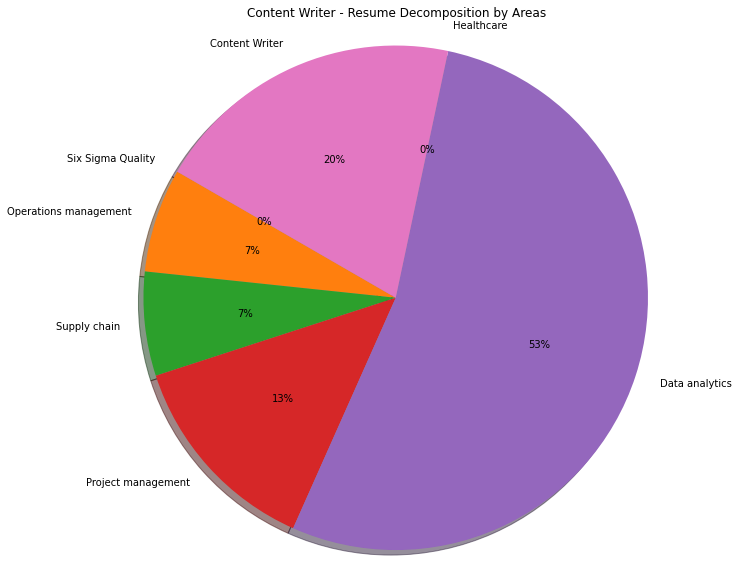

In [ ]:
# Create pie chart visualization
pie = plt.figure(figsize=(10,10))
plt.pie(summary['score'], labels=summary.index, explode = (0,0,0,0,0,0,0), autopct='%1.0f%%',shadow=True,startangle=150)
plt.title('Content Writer - Resume Decomposition by Areas')
plt.axis('equal')
plt.show()

# Save pie chart as a .png file
pie.savefig('resume_screening_results.png')